# Foundations of Data Mining: Assignment 1
Suraj Iyer (0866094)<br>
Simin Chen (0842556)

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100
InteractiveShell.ast_node_interactivity = "all"

## Handwritten digit recognition (5 points, 1+2+2)
The [MNIST dataset](https://www.openml.org/d/554) contains 70,000 images of handwritten digits (0-9) represented by 28 by 28 pixel values. We can easily download it from OpenML and visualize one of the examples:

In [2]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '11e82c8d91c5abece86f424369c71590'

Class label: 5


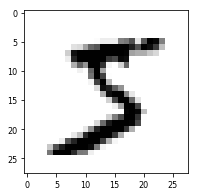

In [3]:
mnist_data = oml.datasets.get_dataset(554)  # Download MNIST data
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)  # Get the predictors X and the labels y
# X, y = X[:2000], y[:2000]  # TODO: REMOVE THIS LATER
plt.imshow(X[0].reshape(28, 28), cmap=plt.cm.gray_r)  # Take the first example, reshape to a 28x28 image and plot
print("Class label:", y[0])  # Print the correct class label

- Evaluate a k-Nearest Neighbor classifier with its default settings.
    - Use the first 60,000 examples as the training set and the last 10,000 as the test set
    - What is the predictive accuracy?
    - Find a few misclassifications, and plot them together with the true labels (as above). Are these images really hard to classify?
- Optimize the value for the number of neighbors $k$ (keep $k$ < 50) on a stratified subsample (e.g. 10%) of the data
    - Use 10-fold crossvalidation and plot $k$ against the misclassification rate. Which value of $k$ should you pick?
    - Do the same but with 100 bootstrapping repeats. Are the results different? Explain.
- Compare kNN against the linear classification models that we have covered in the course (logistic regression and linear SVMs).
    - First use the default hyperparameter settings.
    - Next, optimize for the degree of regularization ($C$) and choice of penalty (L1/L2). Again, plot the accuracy while increasing the degree of regularization for different penalties. Interpret the results. 
    - Report is the optimal performance. Can you get better results than kNN?
    
Report all results clearly and interpret the results.  
Note: while prototyping/bugfixing, you can speed up experiments by taking a smaller sample of the data, but report your results as indicated above.

#### Evaluate a k-Nearest Neighbor classifier with its default settings

X_train: (60000, 784) | y_train: (60000,) | X_test: (10000, 784) | y_test: (10000,)
KNN score (predictive accuracy): 0.968800


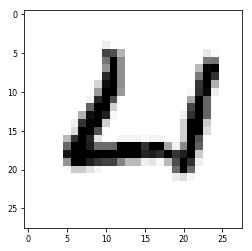

Predicted class label: 0 , True class label: 4


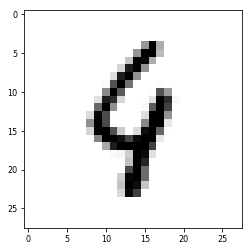

Predicted class label: 9 , True class label: 4


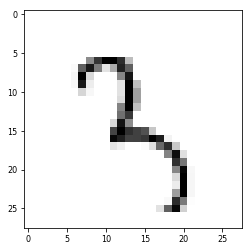

Predicted class label: 1 , True class label: 3


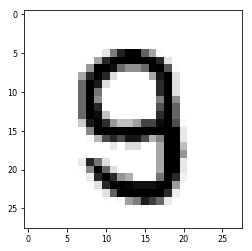

Predicted class label: 8 , True class label: 9


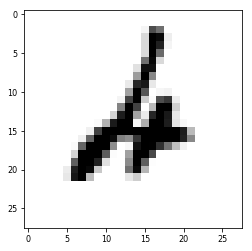

Predicted class label: 6 , True class label: 4


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train, X_test = np.split(X, [60000])
y_train, y_test = np.split(y, [60000])
# X_train, X_test = min_max_scaler.fit_transform(X_train), min_max_scaler.fit_transform(X_test)
print('X_train:', X_train.shape, '| y_train:', y_train.shape, '| X_test:', X_test.shape, '| y_test:', y_test.shape)

# Predictive accuracy
knn = KNeighborsClassifier(n_jobs=-1)
print('KNN score (predictive accuracy): %f' % knn.fit(X_train, y_train).score(X_test, y_test))

# Finding a few misclassifications
X_misc = [(X_test[i], y, y_test[i]) for i, y in enumerate(knn.predict(X_test)) if y != y_test[i]]
for x, y_pred, y_true in X_misc[:5]:
    plt.imshow(x.reshape(28, 28), cmap=plt.cm.gray_r)
    plt.show()
    print("Predicted class label:", y_pred, ", True class label:", y_true)

Some of the images are indeed quite difficult to recognize even by human. For example, the first misclassified 4 is not recognizable as any number, even as its predicted value. The second misclassified 4 looks quite like 9.

#### Optimize the value for the number of neighbors $k$ (keep $k$ < 50) on a stratified subsample (e.g. 10%) of the data

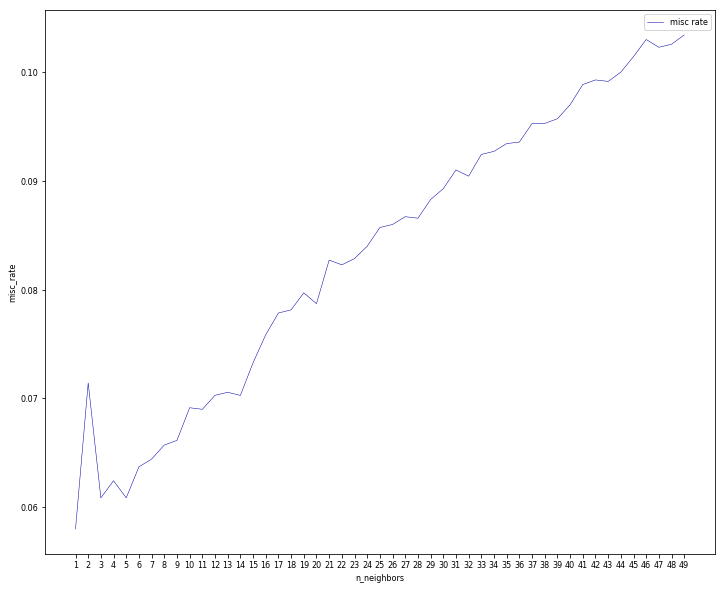

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Build a list of the training and test scores for increasing k
misc_rate = []
k = range(1, 50)

# Get 10% of the data
X_train, _, y_train, _ = train_test_split(X, y, stratify=y, train_size=.1, random_state=66)

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    misc_rate.append(1.-np.mean(scores))

# plot the data
plt.rcParams['figure.figsize'] = (12., 10.)
plt.plot(k, misc_rate, label="misc rate")
_ = plt.xticks(k)
_ = plt.ylabel("misc_rate")
_ = plt.xlabel("n_neighbors")
_ = plt.legend()
plt.rcParams['figure.figsize'] = (6., 4.)

We should take $k = 1$ because it has the least misclassification rate.

#### Doing the same as above but with 100 bootstrapping repeats.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=100, train_size=0.66, random_state=66)

# Build a list of the training and test scores for increasing k
misc_rate = []
k = range(1, 50)

# Get 10% of the data
X_train, _, y_train, _ = train_test_split(X, y, stratify=y, train_size=.1, random_state=66)

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(clf, X_train, y_train, cv=sss, n_jobs=-1)
    misc_rate.append(1-np.mean(scores))

# plot the data
plt.rcParams['figure.figsize'] = (12., 10.)
plt.plot(k, misc_rate, label="misc rate")
_ = plt.xticks(k)
_ = plt.ylabel("misc_rate")
_ = plt.xlabel("n_neighbors")
_ = plt.legend()
plt.rcParams['figure.figsize'] = (6., 4.)

There is more variation in the result without bootstrapping repeat, while the misclassification rate grows more smoothly as the number of neighbors increases with bootstrapping repeat. This is because there is no guarantee for the randomness of the training data. By taking 100 times bootstrapping, the cross-validation score is averaged across multiple random permutation of the training data. Therefore the result is more stable.

#### Compare kNN against the linear classification models that we have covered in the course (logistic regression and linear SVMs) using the default hyperparameter settings.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score

# Get 10% of the data
X_train, _, y_train, _ = train_test_split(X, y, stratify=y, train_size=.1, random_state=66)

# Build the models
logistic, svc = LogisticRegression(), LinearSVC()

for clf in [logistic, svc]:
    scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    print('%s Mean cross-validation score: %f' % (clf.__class__.__name__, np.mean(scores)))

LogisticRegression Mean cross-validation score: 0.827266
LinearSVC Mean cross-validation score: 0.838994


#### Optimizing for the degree of regularization ($C$) and choice of penalty (L1/L2).

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

LogisticRegression score: 0.918361


([<matplotlib.axis.XTick at 0x29714b18f98>,
 <a list of 6 Text xticklabel objects>)

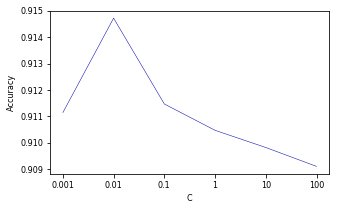

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=.66, random_state=66)

# Build the models
logistic_l1, logistic_l2, svc = LogisticRegression(penalty='l1'), LogisticRegression(penalty='l2'), LinearSVC()
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100] }

for clf in [logistic_l1, logistic_l2, svc]:
    grid_search = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
    _ = grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print('%s score: %f' % (clf.__class__.__name__, score))
    _ = plt.xlabel('C')
    _ = plt.xticks(np.arange(len(param_grid['C'])), param_grid['C'])
    _ = plt.ylabel('Accuracy')
    plt.plot(np.arange(len(param_grid['C'])), grid_search.cv_results_['mean_test_score'])
    plt.show()

## Model selection (4 points (2+2))
Study how RandomForest hyperparameters interact on the Ionosphere dataset (OpenML ID 59).

- Optimize a RandomForest, varying both $n\_estimators$ and $max\_features$ at the same time. Use a nested cross-validation and a grid search (or random search) over the possible values, and measure the AUC. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal AUC performance you find?
- Again, vary both hyperparameters, but this time use a grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow AUC$ with AUC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

Hint: Running this experiment can take a while, so start early and use a feasible grid/random search. Start with a coarse grid or few random search iterations.
Hint: Use a log scale (1,2,4,8,16,...) for $n\_estimators$. Vary $max\_features$ linearly between 1 and the total number of features. Note that, if you give $max\_features$ a float value, it will use it as [the percentage of the total number of features](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


In [39]:
from sklearn.ensemble import RandomForestClassifier

ionosphere = oml.datasets.get_dataset(59)  # Download Ionosphere data
X, y = ionosphere.get_data(target=ionosphere.default_target_attribute)  # Get the predictors X and the labels y
X.shape, y.shape

((351, 34), (351,))

#### Optimize a RandomForest, varying both $n\_estimators$ and $max\_features$ at the same time using a nested cross-validation and a randomized search.

In [8]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [2**i for i in range(0,12)],
    'max_features': np.arange(1, X.shape[1]+1, 3)
}
grid_search = RandomizedSearchCV(clf, param_grid, cv=5, scoring='roc_auc', n_iter=80, n_jobs=-1)
scores = cross_val_score(grid_search, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
print('Scores:', scores)
print('Mean cross-validation score:', scores.mean())

Scores: [ 0.98   0.969  0.933  1.     0.992]
Mean cross-validation score: 0.975001709402


When $n\_iter = 20$, we are able to get the best results within acceptable time limit. We tested with higher iterations but they gave negligable improvements to the performance but at the same time took way longer to train. So, we decided to stick with 20 iterations. The optimal AUC score we found was 1.

#### Again, vary both hyperparameters, but this time use a grid search and visualize the results as a plot (heatmap)

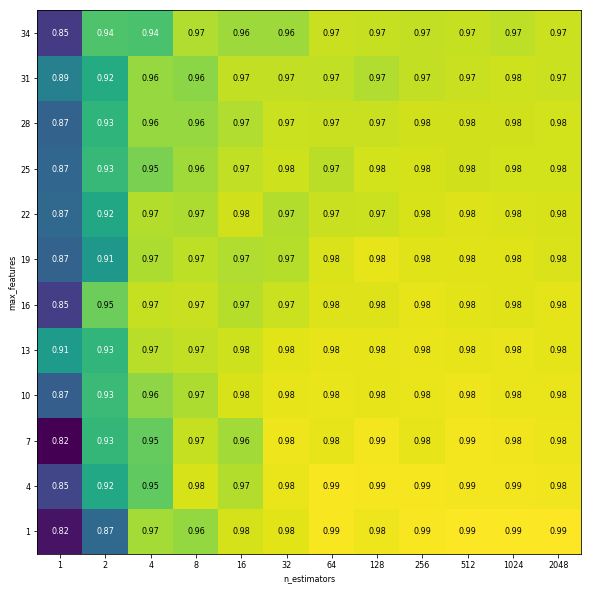

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, _, y_train, _ = train_test_split(X, y, stratify=y, train_size=.66, random_state=66)
clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [2**i for i in range(0, 12)],
    'max_features': np.arange(1, X.shape[1]+1, 3)
}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
_ = grid_search.fit(X_train, y_train)
results = grid_search.cv_results_
scores = np.array(results['mean_test_score']).reshape(len(param_grid['max_features']), len(param_grid['n_estimators']))

# Display the heatmap
plt.rcParams['figure.figsize'] = (12., 10.)
mglearn.tools.heatmap(scores, xlabel='n_estimators', xticklabels=param_grid['n_estimators'], 
                      ylabel='max_features', yticklabels=param_grid['max_features'], cmap="viridis")
plt.rcParams['figure.figsize'] = (6., 4.)

The heat map shows that for this specific data set, the more trees in the RandomForest model the better. With $n\_estimators \geq 16$, the score does not change much anymore. When the number of trees is fixed, the less $max\_features$, the better for when $n\_estimators \geq 16$ while for $n\_estimators \leq 8$, more optimal results come when $max\_features$ is somewhere in between. Normally it would be expected that with more number of features to choose from, we should get better results but obviously based on the results, this is not the case. Apparently, by introducing more number of features, the number of differences between trees generated reduces, thereby decreasing diversity of the forest. The lesser the diversity, the more chances of incorrect predictions if the model is wrong. On the other hand, when there are not enough trees, the number of features plays relatively greater role.

## Decision tree heuristics (1 point)
Consider the toy training set created below. It predicts whether your date agrees to go out with you depending on the weather.

Learn a decision tree:

- Implement functions to calculate entropy and information gain
- What is the class entropy for the entire dataset? What is the information gain when you split the data using the *Water* feature?
- Implement a basic decision tree:
    - Select a feature to split on according to its information gain. If multiple features are equally good, select the leftmost one.
    - Split the data and repeat until the tree is complete.
    - Print out the results (nodes and splits).
- Now train a scikit-learn decision tree on the same data. Do you get the same result? Explain.

In [38]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"Sky": ['sunny', 'sunny', 'rainy', 'sunny', 'sunny'],
                   "AirTemp": ['warm', 'warm', 'warm', 'cold', 'warm'],
                   "Humidity": ['normal', 'high', 'high', 'high', 'normal'],
                   "Wind": ['strong', 'strong', 'strong', 'strong', 'weak'],
                   "Water": ['warm', 'warm', 'cool', 'warm', 'warm'],
                   "Forecast": ['same', 'same', 'change', 'change', 'same'],
                   "Date?": ['yes', 'yes', 'no', 'yes', 'no']
                   })
df = df[['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'Date?']]  # Fix column ordering
df  # print

# One-hot encode
cols_to_transform = ['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'Date?']
df1 = pd.get_dummies(df, columns=cols_to_transform)
df1.drop(['Sky_rainy', 'AirTemp_cold', 'Humidity_high', 'Wind_strong', 
          'Water_cool', 'Forecast_change', 'Date?_no'], axis=1, inplace=True)
df1

,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
2,rainy,warm,high,strong,cool,change,no
3,sunny,cold,high,strong,warm,change,yes
4,sunny,warm,normal,weak,warm,same,no


,Sky_sunny,AirTemp_warm,Humidity_normal,Wind_weak,Water_warm,Forecast_same,Date?_yes
0,1,1,1,0,1,1,1
1,1,1,0,0,1,1,1
2,0,1,0,0,0,0,0
3,1,0,0,0,1,0,1
4,1,1,1,1,1,1,0


In [10]:
# Complete these functions first
# pos and neg are the number of positive and negative samples in a node
def entropy(pos, neg):
    if pos <= 0 or neg <= 0:
        return 0
    p = pos/(pos+neg)
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

# pos1 and pos2 are the number of positive examples in each branch after the split. 
# Same for neg1 and neg2 
def info_gain(pos1, neg1, pos2, neg2):
    pos, neg = pos1 + neg1, pos2 + neg2
    E_before = entropy(pos1+pos2, neg1+neg2)
    E_after = (pos * entropy(pos1, neg1) + neg * entropy(pos2, neg2))/ (pos+neg)
    return E_before - E_after

#### What is the class entropy for the entire dataset? What is the information gain when you split the data using the Water feature?

In [11]:
pos1 = len(df1[df1['Date?_yes']==1])
neg1 = len(df1[df1['Date?_yes']==0])
E = entropy(pos1, neg1)  # class entropy of entire dataset
print('Class entropy:', E)

pos2 = len(df1[(df1['Water_warm']==0) & (df1['Date?_yes']==1)])
neg2 = len(df1[(df1['Water_warm']==0) & (df1['Date?_yes']==0)])
pos3 = len(df1[(df1['Water_warm']==1) & (df1['Date?_yes']==1)])
neg3 = len(df1[(df1['Water_warm']==1) & (df1['Date?_yes']==0)])

IG = info_gain(pos2, neg2, pos3, neg3)
print('Information gain:', IG)

Class entropy: 0.970950594455
Information gain: 0.321928094887


#### Implement a basic decision tree

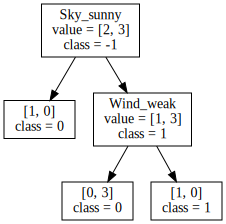

In [12]:
from graphviz import Digraph

def create_tree(df, features=None, dot=Digraph(), parent=None, sclass=-1):
    global i
    if features is None:
        features = list(df)
        features.remove('Date?_yes')
    max_IG, best_f = -1, -1
    node_id = str(i)
    i+=1
    
    # stop when count of either class is zero
    pos1 = len(df[df['Date?_yes']==1])
    neg1 = len(df[df['Date?_yes']==0])
    E = entropy(pos1, neg1)  # class entropy of entire dataset
    if E == 0:
        # display nodes
        dot.node(node_id, '[%d, %d] \n class = %d' % (neg1, pos1, sclass))
        if parent:
            dot.edge(parent, node_id)
        return

    # find the best splitting feature
    for f in features:
        pos2 = len(df[(df[f]==0) & (df['Date?_yes']==1)])
        neg2 = len(df[(df[f]==0) & (df['Date?_yes']==0)])
        pos3 = len(df[(df[f]==1) & (df['Date?_yes']==1)])
        neg3 = len(df[(df[f]==1) & (df['Date?_yes']==0)])
        
        IG = info_gain(pos2, neg2, pos3, neg3)
        if IG > max_IG:
            max_IG = IG
            best_f = f
    
    # stop if gain is zero
    if max_IG <= 0:
        # display nodes
        dot.node(node_id, '[%d, %d] \n class = %d' % (neg1, pos1, sclass))
        if parent:
            dot.edge(parent, node_id)
        return
    
    # split on that feature | display nodes
    dot.node(node_id, '%s \n value = [%d, %d] \n class = %d' % (best_f, neg1, pos1, sclass))
    if parent:
        dot.edge(parent, node_id)
    features.remove(best_f)
    create_tree(df[df[best_f] == 0], features, dot, node_id, sclass=0)
    create_tree(df[df[best_f] == 1], features, dot, node_id, sclass=1)
    
    return dot

# Create the tree and display the graph
i=0
g = Digraph(name='Decision Tree', node_attr={'shape': 'rectangle'})
display(create_tree(df1, dot=g))

#### Train a scikit-learn decision tree on the same data

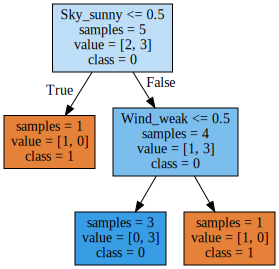

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# build a tree model
X, y = df1.drop('Date?_yes', axis=1), df1['Date?_yes']
clf = DecisionTreeClassifier(criterion='entropy', random_state=10)
_ = clf.fit(X, y)

# Creates a .dot file
export_graphviz(clf, out_file="tree.dot", class_names=['1', '0'], 
                feature_names=list(X), impurity=False, filled=True)

# Open and display
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

We can see clearly that the results from both decision trees are the same.

## Random Forests (4 points (1+1+2))
Study the effect of the number of trees in a RandomForest on the EEG-eye-state dataset (http://www.openml.org/d/1471). This dataset measures brain activity using 15 sensors, and you need to predict whether the person's eyes are open or closed. 

* Train a RandomForest classifier on this dataset with an increasing number of trees (on a log scale as above). Plot the Out-Of-Bag error against the number of trees.
    - The Out-Of-Bag error is the test error obtained when using bootstrapping, and using the non-drawn data points as the test set. This is what a RandomForest does internally, so you can retrieve it from the classifier. The code below hints on how to do this.
* Construct the same plot, but now use 10-fold Cross-validation and error rate instead of the OOB error. Compare the two. What do you learn from this?
* Compare the performance of the RandomForest ensemble with that of a single full decision tree. Compute the AUC as well as the bias and variance. Does the bias and variance increase/decrease for the ensemble? Does the number of trees affect the result?

Hint: Error rate = 1 - accuracy. It is not a standard scoring metric for cross_val_score, so you'll need to let it compute the accuracy values, and then compute the mean error rate yourself.  
Hint: We discussed bias-variance decomposition in class. It is not included in scikit-learn, so you'll need to implement it yourself. Always first calculate the bias and variance of each sample individually, and then sum them up.

In [13]:
from sklearn import ensemble
eeg = oml.datasets.get_dataset(1471)  # Download Ionosphere data
X, y = eeg.get_data(target=eeg.default_target_attribute)

#### Plot the Out-Of-Bag error against the number of trees.

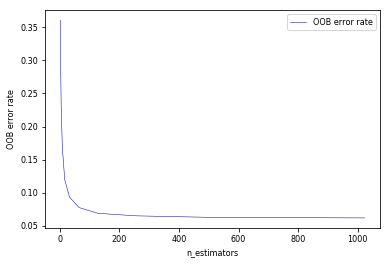

In [27]:
# Out of bag errors can be retrieved from the RandomForest classifier. You'll need to loop over the number of trees.
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html
clf = ensemble.RandomForestClassifier(warm_start=True, oob_score=True, random_state=66)
n_estimators = [2**i for i in range(0,11)]
results = []

for i in n_estimators:
    _ = clf.set_params(n_estimators=i)
    _ = clf.fit(X, y)
    results.append(1 - clf.oob_score_)
    
# plot the data
plt.plot(n_estimators, results, label="OOB error rate")
_ = plt.ylabel("OOB error rate")
_ = plt.xlabel("n_estimators")
_ = plt.legend()

#### Construct the same plot, but now use 10-fold Cross-validation and error rate instead of the OOB error.

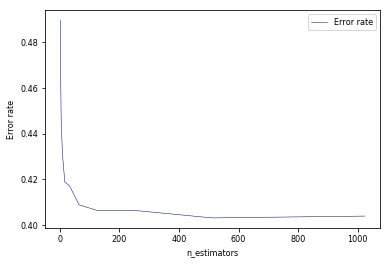

In [26]:
from sklearn.model_selection import cross_val_score

clf = ensemble.RandomForestClassifier(random_state=66)
n_estimators = [2**i for i in range(0,11)]
results = []

for i in n_estimators:
    _ = clf.set_params(n_estimators=i)
    scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    results.append(1 - scores.mean())
    
# plot the data
plt.plot(n_estimators, results, label="Error rate")
_ = plt.ylabel("Error rate")
_ = plt.xlabel("n_estimators")
_ = plt.legend()

Both of them share the same trend, while the OOB error is much smaller than the CV error rate for fixed number of estimators. Comparing to the CV error, the OOB error plot is smoother. This is because the OOB error is taken as the average of the all estimated errors as the forest grows. Therefore OOB should be taken as the measure.

#### Compare the performance of the RandomForest ensemble with that of a single full decision tree.

In [32]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

n_repeat = 100
ss = ShuffleSplit(n_splits=n_repeat, train_size=0.66, test_size=0.34, random_state=66)
clf = ensemble.RandomForestClassifier(random_state=66, n_jobs=-1)
n_estimators = [2**i for i in range(0, 12)]+[-1]
results = {'bias': [], 'variance': []}

def bias(x_true, x_predicted):
    return (x_true - np.mean(x_predicted))**2

def variance(x_predicted):
    P_class_1 = np.mean(x_predicted)
    P_class_0 = 1 - P_class_1
    return (1 - ((P_class_1)**2 + (P_class_0)**2))/ 2

for i in n_estimators:
    predictions = [[] for _ in range(len(y))]
    scores = []
    
    if i == -1:
        clf = DecisionTreeClassifier(random_state=66)
    else:
        _ = clf.set_params(n_estimators=i)
    
    for train_index, test_index in ss.split(X):
        # Train and predict
        _ = clf.fit(X[train_index], y[train_index])
        y_pred = clf.predict(X[test_index])
        scores.append(roc_auc_score(y[test_index], y_pred))

        # Store predictions
        for k, index in enumerate(test_index):
            predictions[index].append(y_pred[k])
    
    bias_sq = sum([bias(y[k], x) * (len(x) / n_repeat) for k, x in enumerate(predictions)])
    var = sum([variance(x) * (len(x) / n_repeat) for x in predictions])
    results['bias'].append(bias_sq)
    results['variance'].append(var)
    results['score'].append(np.mean(scores))
    
# plot the data
plt.plot(n_estimators, results['bias'])
_ = plt.ylabel("bias")
_ = plt.xlabel("n_estimators")
_ = plt.legend()
plt.show()

plt.plot(n_estimators, results['variance'])
_ = plt.ylabel("variance")
_ = plt.xlabel("n_estimators")
_ = plt.legend()
plt.show()

plt.plot(n_estimators, results['score'])
_ = plt.ylabel("roc_auc")
_ = plt.xlabel("n_estimators")
_ = plt.legend()
plt.show()

KeyboardInterrupt: 

## A regression benchmark (1 point)
Consider the liver-disorder dataset (http://www.openml.org/d/8). The goal is to predict how much alcohol someone consumed based on blood test values.

- Take a selection of the algorithms that we covered in class that can do regression.
- Based on what you learned in the previous exercises, make educated guesses about good hyperparameter values and set up a grid or random search.
- Evaluate all models with 10-fold cross-validation and root mean squared error (RMSE). Report all results. Which model yields the best results?

Hint: mean squared error (MSE) is a standard scoring technique in GridSearchCV and cross_val_score. You'll have to compute the square roots yourself. Of course, during a grid search you can just use MSE, the optimal hyperparameter values will be the same.

((345, 5), (345,))

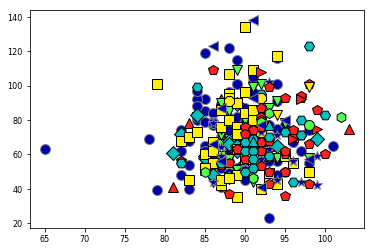

In [34]:
liver = oml.datasets.get_dataset(8)  # Download Liver-disorders data
X, y = liver.get_data(target=liver.default_target_attribute)
X.shape, y.shape
_ = mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

#### Take a selection of the algorithms that we covered in class that can do regression. Make educated guesses about good hyperparameter values.

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

estimators = [("knn", KNeighborsRegressor(n_jobs=-1)),
              ("linear", LinearRegression(n_jobs=-1)),
              ('ridge', Ridge()),
              ('lasso', Lasso()),
              ('elasticnet', ElasticNet()),
              ('rf', RandomForestRegressor(random_state=66, n_jobs=-1)),
              ('decision', DecisionTreeRegressor(random_state=66))]
#               ('sgd', SGDRegressor(n_iter=30000))]

param_grid = {
    'knn': {'n_neighbors': range(1, 51)},
    'linear': {},
    'ridge': {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
    'lasso': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [10000, 1000, 100]
    },
    'elasticnet': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.05, 0.25, 0.5, 0.75, 0.95, 1],
        'max_iter': [10000, 1000, 100]
    },
#     'sgd': {
#         'penalty': ['l2', 'l1', 'elasticnet'],
#         'alpha': [10, 100, 1000, 10000, 100000],#0.001, 0.01, 0.1, 1, 
#         'l1_ratio': [0.05, 0.25, 0.5, 0.65, 0.75, 0.95, 1]
#     }
    'rf': {
        'n_estimators': [2**i for i in range(0,12)],
        'max_features': np.arange(1, X.shape[1]+1)
    },
    'decision': {'max_features': np.arange(1, X.shape[1]+1)}
}

#### Evaluate all models with 10-fold cross-validation and root mean squared error (RMSE).

In [36]:
from sklearn.model_selection import GridSearchCV

for key, clf in estimators:
    print('##### %s #####' % key)
    grid_search = GridSearchCV(clf, param_grid[key], cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    _ = grid_search.fit(X, y)
    
    # Get the RMSE
    scores = np.sqrt(-1*grid_search.cv_results_['mean_test_score'])
    scores_with_params = list(zip(grid_search.cv_results_['params'], scores))
    print('Scores:')
    scores_with_params
    print('Mean score:', np.mean(scores), '+-', np.var(scores))

##### knn #####
Scores:


[({'n_neighbors': 1}, 4.6718397828394904),
 ({'n_neighbors': 2}, 3.9625054290640813),
 ({'n_neighbors': 3}, 3.8609069212334477),
 ({'n_neighbors': 4}, 3.826987501068345),
 ({'n_neighbors': 5}, 3.7535374619498434),
 ({'n_neighbors': 6}, 3.6884836224622584),
 ({'n_neighbors': 7}, 3.6456876106424962),
 ({'n_neighbors': 8}, 3.5867042621002523),
 ({'n_neighbors': 9}, 3.5494412000129341),
 ({'n_neighbors': 10}, 3.51942436004625),
 ({'n_neighbors': 11}, 3.5437616308925772),
 ({'n_neighbors': 12}, 3.5179605880215297),
 ({'n_neighbors': 13}, 3.5083640734435151),
 ({'n_neighbors': 14}, 3.5361550010794596),
 ({'n_neighbors': 15}, 3.5437109473802924),
 ({'n_neighbors': 16}, 3.5329213211723527),
 ({'n_neighbors': 17}, 3.5394826479833688),
 ({'n_neighbors': 18}, 3.5266373827202897),
 ({'n_neighbors': 19}, 3.5459079805884355),
 ({'n_neighbors': 20}, 3.5381000796915067),
 ({'n_neighbors': 21}, 3.5371318492183939),
 ({'n_neighbors': 22}, 3.5335642313091804),
 ({'n_neighbors': 23}, 3.5324868865626216),


Mean score: 3.58539481065 +- 0.0325845161212
##### linear #####
Scores:


[({}, 3.4456431153534575)]

Mean score: 3.44564311535 +- 0.0
##### ridge #####
Scores:


[({'alpha': 0.001}, 3.4456429541410283),
 ({'alpha': 0.01}, 3.4456429901954428),
 ({'alpha': 0.1}, 3.4456433507597781),
 ({'alpha': 1}, 3.4456469584214031),
 ({'alpha': 10}, 3.44568323603474),
 ({'alpha': 100}, 3.4460653050861536)]

Mean score: 3.44572079911 +- 2.3943352142e-08
##### lasso #####
Scores:


[({'alpha': 0.001, 'max_iter': 10000}, 3.4456520755314606),
 ({'alpha': 0.001, 'max_iter': 1000}, 3.4456520755314606),
 ({'alpha': 0.001, 'max_iter': 100}, 3.4456520755314606),
 ({'alpha': 0.01, 'max_iter': 10000}, 3.4457314402092551),
 ({'alpha': 0.01, 'max_iter': 1000}, 3.4457314402092551),
 ({'alpha': 0.01, 'max_iter': 100}, 3.4457314402092551),
 ({'alpha': 0.1, 'max_iter': 10000}, 3.4466972827693763),
 ({'alpha': 0.1, 'max_iter': 1000}, 3.4466972827693763),
 ({'alpha': 0.1, 'max_iter': 100}, 3.4466972827693763),
 ({'alpha': 1, 'max_iter': 10000}, 3.4630936276346374),
 ({'alpha': 1, 'max_iter': 1000}, 3.4630936276346374),
 ({'alpha': 1, 'max_iter': 100}, 3.4630936276346374),
 ({'alpha': 10, 'max_iter': 10000}, 3.5743704593953392),
 ({'alpha': 10, 'max_iter': 1000}, 3.5743704593953392),
 ({'alpha': 10, 'max_iter': 100}, 3.5743704593953392),
 ({'alpha': 100, 'max_iter': 10000}, 3.7276453159068561),
 ({'alpha': 100, 'max_iter': 1000}, 3.7276453159068561),
 ({'alpha': 100, 'max_iter': 1

Mean score: 3.51719836691 +- 0.0109467809334
##### elasticnet #####
Scores:


[({'alpha': 0.001, 'l1_ratio': 0.05, 'max_iter': 10000}, 3.4456450472610993),
 ({'alpha': 0.001, 'l1_ratio': 0.05, 'max_iter': 1000}, 3.4456450472610993),
 ({'alpha': 0.001, 'l1_ratio': 0.05, 'max_iter': 100}, 3.4456447414034912),
 ({'alpha': 0.001, 'l1_ratio': 0.25, 'max_iter': 10000}, 3.4456462971347173),
 ({'alpha': 0.001, 'l1_ratio': 0.25, 'max_iter': 1000}, 3.4456462971347173),
 ({'alpha': 0.001, 'l1_ratio': 0.25, 'max_iter': 100}, 3.4456462971347173),
 ({'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 10000}, 3.4456482185289428),
 ({'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000}, 3.4456482185289428),
 ({'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 100}, 3.4456482185289428),
 ({'alpha': 0.001, 'l1_ratio': 0.75, 'max_iter': 10000}, 3.4456502169017842),
 ({'alpha': 0.001, 'l1_ratio': 0.75, 'max_iter': 1000}, 3.4456502169017842),
 ({'alpha': 0.001, 'l1_ratio': 0.75, 'max_iter': 100}, 3.4456502169017842),
 ({'alpha': 0.001, 'l1_ratio': 0.95, 'max_iter': 10000}, 3.4456517244213303),
 

Mean score: 3.50490342532 +- 0.0088617594994
##### rf #####
Scores:


[({'max_features': 1, 'n_estimators': 1}, 4.548291604738985),
 ({'max_features': 1, 'n_estimators': 2}, 3.7984550635179586),
 ({'max_features': 1, 'n_estimators': 4}, 3.6630499290357337),
 ({'max_features': 1, 'n_estimators': 8}, 3.6955773116884818),
 ({'max_features': 1, 'n_estimators': 16}, 3.4722600239488175),
 ({'max_features': 1, 'n_estimators': 32}, 3.4398785413919755),
 ({'max_features': 1, 'n_estimators': 64}, 3.4076287762624018),
 ({'max_features': 1, 'n_estimators': 128}, 3.3743953996668163),
 ({'max_features': 1, 'n_estimators': 256}, 3.3596206818971868),
 ({'max_features': 1, 'n_estimators': 512}, 3.3722451269895695),
 ({'max_features': 1, 'n_estimators': 1024}, 3.3678463463711039),
 ({'max_features': 1, 'n_estimators': 2048}, 3.3671248283237616),
 ({'max_features': 2, 'n_estimators': 1}, 4.3744979007947835),
 ({'max_features': 2, 'n_estimators': 2}, 3.9378321115977553),
 ({'max_features': 2, 'n_estimators': 4}, 3.6660160819401049),
 ({'max_features': 2, 'n_estimators': 8},

Mean score: 3.62141167867 +- 0.0964402772581
##### decision #####
Scores:


[({'max_features': 1}, 4.7800915642191253),
 ({'max_features': 2}, 4.6603476887148823),
 ({'max_features': 3}, 4.7539457296018854),
 ({'max_features': 4}, 4.8060951639181768),
 ({'max_features': 5}, 4.5342496942553874)]

Mean score: 4.70694596814 +- 0.00987704429714


We stopped testing with SGD regressor because it took too much time to train and also produced very poor results. Overall, Linear regression and Ridge regression scored the same and the best. ElasticNet and Lasso regression models produced the same $RMSE=3.446$ as Linear and Ridge regression for some combination of the parameters but got progressively worse for other combinations especially from increase in alpha (greater regularization). You can see for which combinations the models produced the best result. Random Forests Regression even produced $RMSE \leq 3.446$ when $n\_estimators$ was sufficiently large and $max\_features$ generally low but on average was worse. Lastly, KNN regression and Decision tree regression produced relatively bad results.